# Ensemble learning (regression)

In [2]:
%load_ext autoreload
%autoreload 2

!python --version

Python 3.7.6


In [4]:
import sys
sys.path.append('..')
from src.dataset import DatasetForRegression
from src.evaluation import custom_regression_report
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR


## Load the dataset

In [7]:
dataset = DatasetForRegression('../data/fifa_processed_for_reg.csv', ['Value'])
X_train, X_test, y_train, y_test = dataset.get_data('Value')

## Voting regressor

The idea behind the VotingRegressor is to combine conceptually different machine learning regressors and return the average predicted values. Such a regressor can be useful for a set of equally well performing models in order to balance out their individual weaknesses.

MSE: 3889756400725.573
RMSE: 1972246.5364972942
Explained variance - uniform_average (higher is better): 0.8860262634978286
Explained variance - variance_weighted (higher is better): 0.8860262634978286




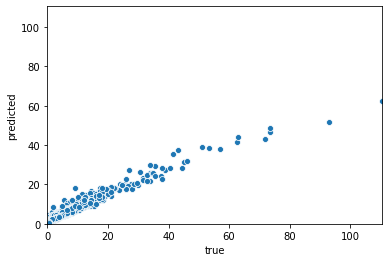

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
vreg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
vreg = vreg.fit(X_train, y_train)

custom_regression_report(vreg, X_test, y_test)

## Stacked regressor

Stacked generalization is a method for combining estimators to reduce their biases [W1992] [HTF]. More precisely, the predictions of each individual estimator are stacked together and used as input to a final estimator to compute the prediction. This final estimator is trained through cross-validation.

MSE: 5538584914485.398
RMSE: 2353419.8338769474
Explained variance - uniform_average (higher is better): 0.8377990572462702
Explained variance - variance_weighted (higher is better): 0.8377990572462702




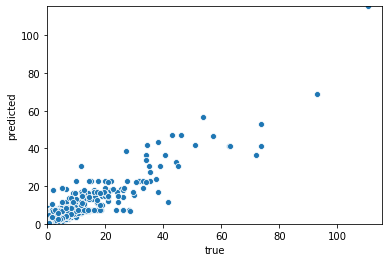

In [9]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

estimators = [('ridge', RidgeCV()), ('lasso', LassoCV(random_state=42)), ('svr', SVR(C=1, gamma=1e-6))]
reg = StackingRegressor(estimators=estimators, final_estimator=GradientBoostingRegressor(random_state=42))
reg = reg.fit(X_train, y_train)

custom_regression_report(reg, X_test, y_test)